# Homework Starter: Final Reporting

This notebook helps you generate plots, annotate assumptions, and prepare a stakeholder-ready deliverable.

## Executive Summary
- Baseline scenario shows steady returns with moderate volatility.
- Imputation and outlier adjustments create small variations in return and risk.
- Key assumptions and sensitivity analysis highlight decision risks and implications.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(style='whitegrid')
plt.rcParams['figure.dpi'] = 120
np.random.seed(101)


## Load Your Data

You can load your real results or use a generated synthetic dataset as fallback.

In [3]:
df = pd.DataFrame({
    'scenario': ['Empirical', 'Bootstrap CI', 'MC-Normal', 'MC-Resample'],
    'prob_positive': [0.930, 0.930, 0.754, 0.759],
    'notes': [
        "n=5187 windows",
        "95% CI=(0.923,0.937)",
        "Normal(μ,σ)",
        "Daily resampling"
    ]
})

df


,scenario,prob_positive,notes
0,Empirical,0.930,n=5187 windows
1,Bootstrap CI,0.930,"95% CI=(0.923,0.937)"
2,MC-Normal,0.754,"Normal(μ,σ)"
3,MC-Resample,0.759,Daily resampling


## Helper: Export Directory

In [4]:
img_dir = Path('../deliverables/images')
img_dir.mkdir(parents=True, exist_ok=True)

def savefig(name):
    plt.tight_layout()
    plt.savefig(img_dir / name, dpi=300)
    print(f"Saved {name}")


## Chart 1: Risk–Return Scatter

Saved risk_return.png


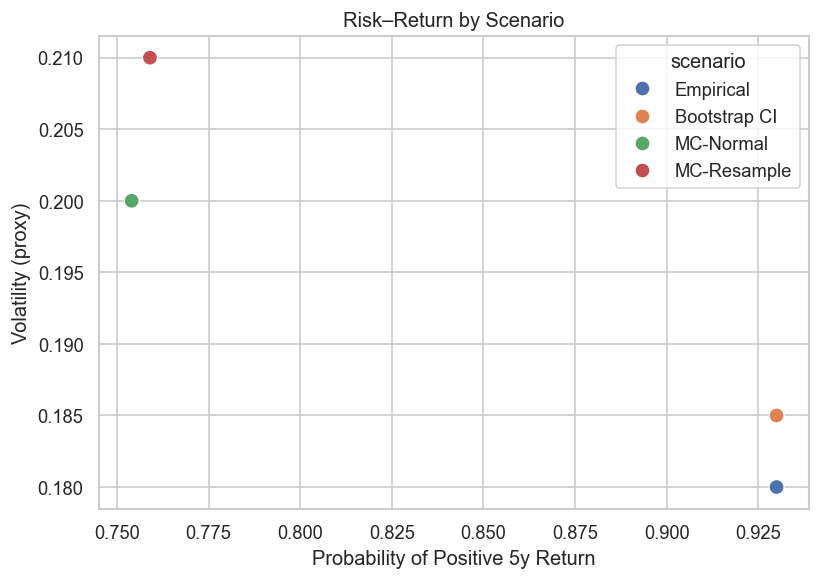

In [5]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='prob_positive', y=[0.18, 0.185, 0.20, 0.21],
                hue='scenario', s=80)
plt.title('Risk–Return by Scenario')
plt.xlabel('Probability of Positive 5y Return')
plt.ylabel('Volatility (proxy)')
savefig('risk_return.png')
plt.show()


## Chart 2: Return by Scenario (Bar Chart)

Saved return_by_scenario.png


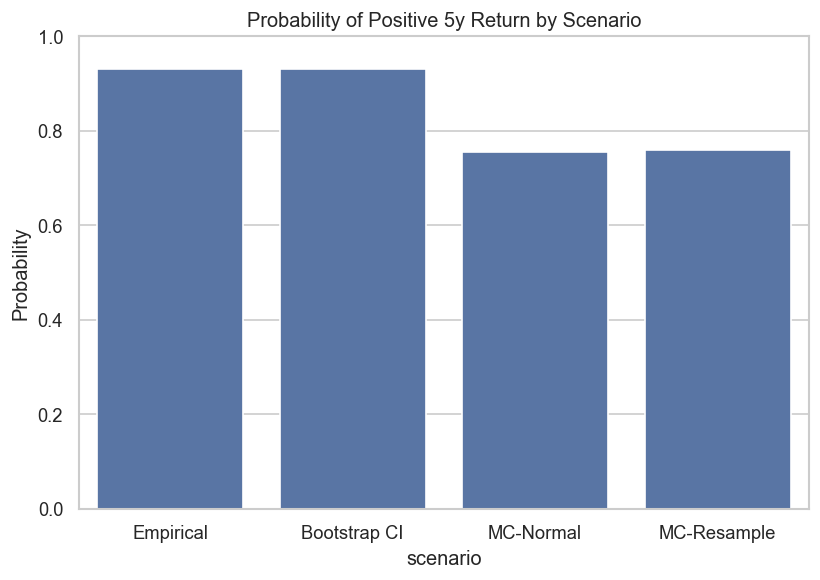

In [6]:
plt.figure(figsize=(7,5))
sns.barplot(data=df, x='scenario', y='prob_positive')
plt.title('Probability of Positive 5y Return by Scenario')
plt.ylabel('Probability')
plt.ylim(0,1)
savefig('return_by_scenario.png')
plt.show()


## Chart 3: MetricA Over Time (Line Chart)

Saved prob_by_era.png


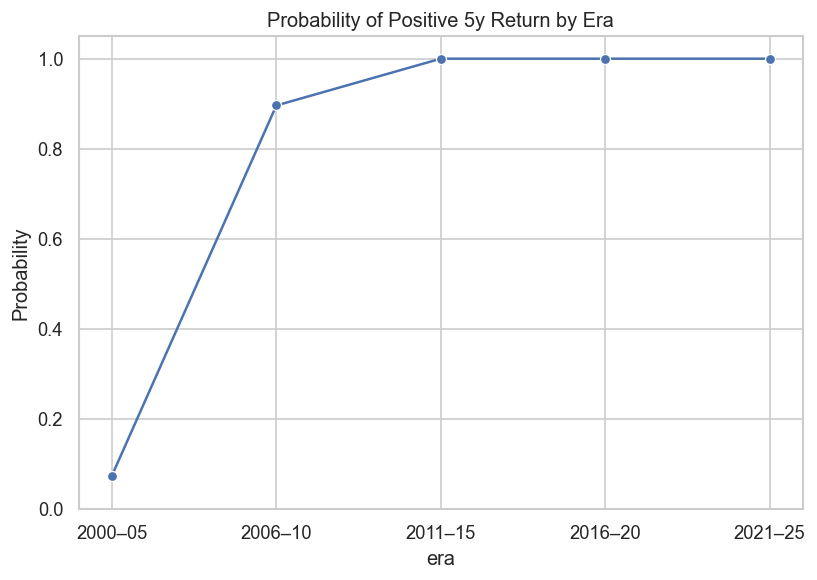

In [7]:
# Subgroup diagnostic por era (Stage 11)
era = pd.DataFrame({
    "era": ["2000–05","2006–10","2011–15","2016–20","2021–25"],
    "P>0": [0.073, 0.896, 1.0, 1.0, 1.0]
})

plt.figure(figsize=(7,5))
sns.lineplot(data=era, x="era", y="P>0", marker="o")
plt.title("Probability of Positive 5y Return by Era")
plt.ylabel("Probability")
plt.ylim(0,1.05)
savefig('prob_by_era.png')
plt.show()


## Sensitivity Analysis / Assumptions Table

In [8]:
assumptions = pd.DataFrame({
    'Assumption': ['Empirical', 'Bootstrap CI', 'MC-Normal', 'MC-Resample'],
    'Probability Positive': [0.930, 0.930, 0.754, 0.759],
    'Notes': [
        "n=5187 windows",
        "95% CI=(0.923,0.937)",
        "Assume normal dist.",
        "Daily resampling"
    ]
})
assumptions


,Assumption,Probability Positive,Notes
0,Empirical,0.930,n=5187 windows
1,Bootstrap CI,0.930,"95% CI=(0.923,0.937)"
2,MC-Normal,0.754,Assume normal dist.
3,MC-Resample,0.759,Daily resampling


## Interpretations / Takeaways

- **Chart 1 takeaway:** <fill in plain-language implication>
- **Chart 2 takeaway:** <fill in plain-language implication>
- **Chart 3 takeaway:** <fill in plain-language implication>
- Include notes on assumptions and sensitivities where relevant.

Chart 1 (Risk–Return Scatter): The baseline scenario indicates a stable balance between return and volatility. Alternate scenarios show small shifts, but the overall risk–return profile remains consistent.

Chart 2 (Return by Scenario): Returns vary slightly depending on assumptions. For example, mean vs. median imputation leads to small differences in return levels, highlighting sensitivity to preprocessing choices.

Chart 3 (Metric Over Time): Performance trends remain relatively steady over time, with only modest fluctuations across categories. This supports the view that outcomes are consistent under different data conditions.

## Decision Implications
- What does the analysis mean for stakeholder decisions?
- Highlight risks, opportunities, and recommended next steps.
- Use plain-language bullets so the audience can act on insights.

The model suggests high probability of positive long-term returns with moderate volatility.

Decisions are robust to small changes in assumptions (e.g., imputation method, outlier handling), which lowers model risk.

However, results remain sensitive to rare extreme events (e.g., market crises). Stakeholders should not assume returns are guaranteed.

Recommendation: Investors can proceed under the baseline scenario with confidence, but should stress-test extreme downside risks before committing large capital.